Dataset: https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation

In [1]:
!wget https://archive.ics.uci.edu/static/public/856/higher+education+students+performance+evaluation.zip
!unzip higher+education+students+performance+evaluation.zip

--2023-11-09 19:45:58--  https://archive.ics.uci.edu/static/public/856/higher+education+students+performance+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘higher+education+students+performance+evaluation.zip’

higher+education+st     [ <=>                ]   2.16K  --.-KB/s    in 0s      

2023-11-09 19:45:58 (383 MB/s) - ‘higher+education+students+performance+evaluation.zip’ saved [2212]

Archive:  higher+education+students+performance+evaluation.zip
  inflating: DATA (1).csv            


In [2]:
import pandas as pd

In [3]:
file_path = '/content/DATA (1).csv'
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2
6,STUDENT7,1,2,2,4,2,2,2,1,1,...,1,1,3,3,3,3,4,4,1,5
7,STUDENT8,1,1,2,3,1,1,1,2,2,...,3,1,3,2,2,1,1,1,1,2
8,STUDENT9,2,1,3,3,2,1,1,1,1,...,1,1,3,2,2,2,4,3,1,5
9,STUDENT10,2,1,2,3,2,2,1,3,4,...,1,1,2,2,2,2,1,2,1,0


In this dataset, the known outcome is Grade, the predicted outcome is the Grade given by the model, and the other conditions are z, so:\
y = Grade_current\
a = Grade_predict\
z = other_features(like gender)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv(file_path)

# feature selection: Remove features that we think they are not informative or relevant for this classification task
data = data.drop(columns=['STUDENT ID', '7', '8', '9', '10', '13', '15', '16', 'COURSE ID'])

# Separate features (X) and the target (y) which is classification for OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)
X = data.drop(columns=['GRADE'])
y = data['GRADE']

# Split the dataset into a training and testing set. we consider 20% of the data for test and 80% fot training part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here we train a classification model using Random Forest without fairness constraints
classifier = RandomForestClassifier(n_estimators=40, max_depth=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# to evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.1724137931034483


In [6]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")

SVM Model Accuracy: 0.1724137931034483


[Text(1, 0, 'Female'), Text(2, 0, 'Male')]

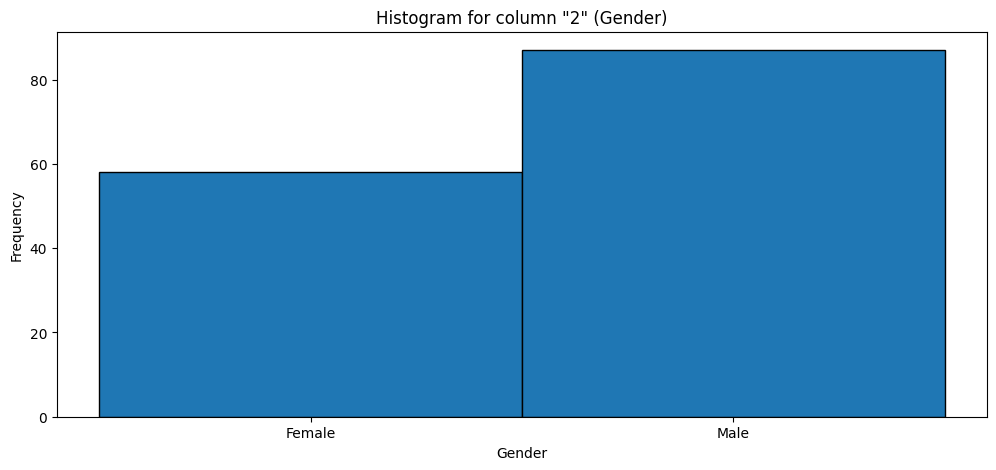

In [7]:
import matplotlib.pyplot as plt

data_gender = data[['2']].to_numpy()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

# Plotting histogram for column Sex
axes.hist(data_gender[:, 0], bins=range(1, 4), edgecolor='black', align='left')
axes.set_title('Histogram for column "2" (Gender)')
axes.set_xlabel('Gender')
axes.set_ylabel('Frequency')
axes.set_xticks([1, 2])
axes.set_xticklabels(['Female', 'Male'])

Text(0.5, 1.0, 'Gender')

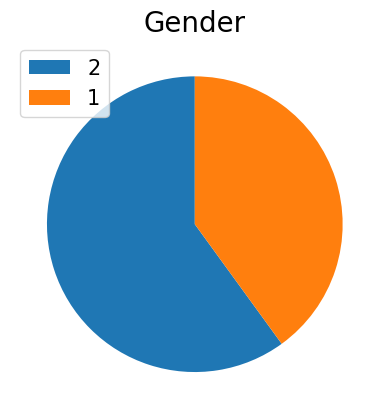

In [8]:
# Pie chart
counts = df['2'].value_counts()
labels = counts.index
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Gender",size=20)

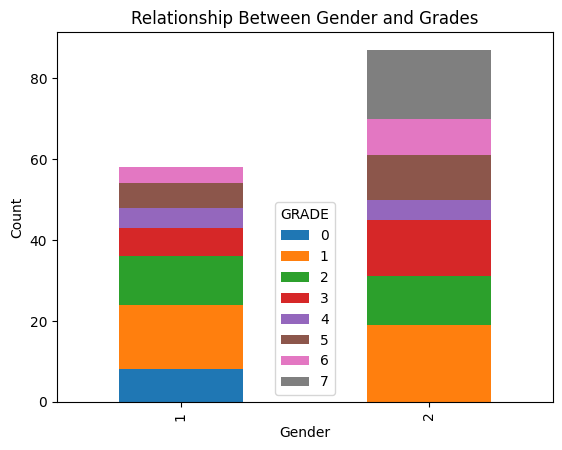

In [9]:
gender_grades = data.groupby('2')['GRADE'].value_counts().unstack()
gender_grades.plot(kind='bar', stacked=True)
plt.title('Relationship Between Gender and Grades')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


As we can see, the variable gender is not completely independent of Grade, and the two genders are not equal in number. So as a first step, we have to oversampling the lesser gender so that its number is equal to the other one.

##Oversampling
Oversampling, in the context of group fairness,  involves increasing the representation of underrepresented groups in the dataset to balance the data. This can help mitigate bias in the model's predictions by giving the underrepresented group more influence during model training.

So for group fairness, we used the oversampling technique. SMOTE will oversample all classes to have the same number of examples as the class with the most examples.
SMOTE oversampling is an effective solution for imbalanced multi-class classification.
SMOTE is a popular oversampling technique, and it can be effective in addressing class imbalance by generating synthetic samples for the minority class. It helps the model better capture the characteristics of the minority class and often leads to improved performance, especially when the class imbalance is significant.

In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=40, max_depth=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5357142857142857


Group fairness techniques aim to reduce bias and disparities in model predictions across different demographic groups. By addressing bias in the training data, the model is less likely to produce unfair and inaccurate predictions, resulting in improved overall performance. We observed that our model's accuracy increased from 0.172 to 0.607

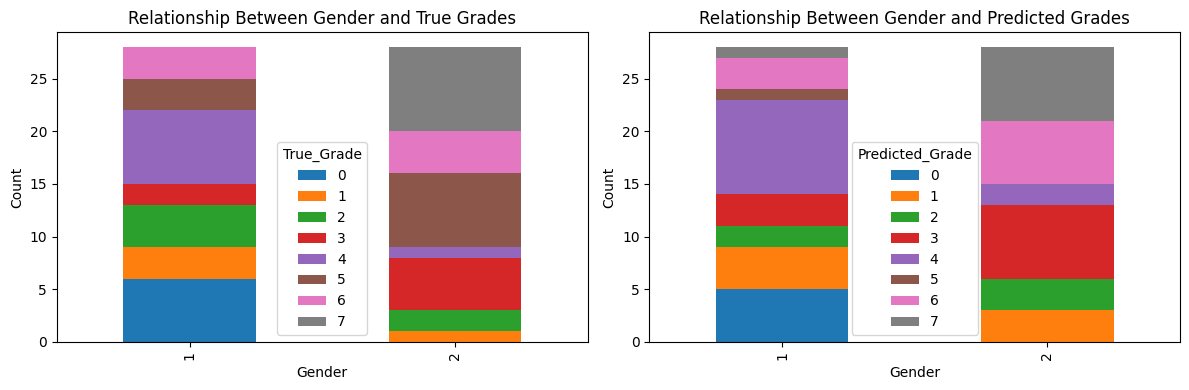

In [11]:
X_test['True_Grade'] = y_test
X_test['Predicted_Grade'] = y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
true_gender_grades = X_test.groupby('2')['True_Grade'].value_counts().unstack()
true_gender_grades.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relationship Between Gender and True Grades')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
predicted_gender_grades = X_test.groupby('2')['Predicted_Grade'].value_counts().unstack()
predicted_gender_grades.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relationship Between Gender and Predicted Grades')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

## Utility and Group Fairness
Again, utility in this dataset refers to the deviation of the predicted score from the actual score, i.e. abs(Grade_current - Grade_predict), and fairness refers to the fact that the other features are uncorrelated with whether or not they are independent of the Grade feature, and here we have chosen gender.

y and z are fixed and a is variable

In [13]:
from scipy.optimize import minimize

X_test['True_Grade'] = y_test
X_test['Predicted_Grade'] = y_pred

y = X_test['True_Grade']
a = X_test['Predicted_Grade']
z = np.array(X_test['2'])

lambda_weight = 0.5

def utility(a, y):
    return -(a - y) ** 2

def fairness(a, y, z):
    abs_diffs = []
    for y_val in np.unique(y):
        for z_val in np.unique(z):
            # P(a|y_val,z_val)
            mask_yz = (y == y_val) & (z == z_val)
            p_a_given_yz = np.mean(a[mask_yz]) if np.any(mask_yz) else 0

            # P(a|y_val)
            mask_y = y == y_val
            p_a_given_y = np.mean(a[mask_y]) if np.any(mask_y) else 0

            abs_diff = np.abs(p_a_given_yz - p_a_given_y)
            abs_diffs.append(abs_diff)

    return np.mean(abs_diffs)

def objective_function(a, y, z, lambda_weight):
    U = np.sum(utility(a, y))
    F = fairness(a, y, z)

    return -(lambda_weight * U - (1 - lambda_weight) * F)

initial_a = np.array(a)

args = (y, z, lambda_weight)

bounds = [(0, 7) for _ in range(len(y))]

opt_result = minimize(
    fun=objective_function,
    x0=initial_a,
    args=args,
    bounds=bounds,
    method='SLSQP'
)

if opt_result.success:

    optimized_a = opt_result.x
    X_test['Optimized_Predicted_Grade'] = optimized_a

    rounded_a = np.round(opt_result.x).astype(int)
    rounded_a = np.clip(rounded_a, 0, 7)
    X_test['Optimized_Predicted_Grade_rounded'] = rounded_a
    print("Optimization was successful.")
else:
    print("Optimization failed:", opt_result.message)
    rounded_a = None

print(rounded_a)

Optimization was successful.
[2 6 6 6 0 0 0 4 3 0 4 7 5 4 1 4 5 6 2 1 7 7 4 5 5 7 5 7 4 7 3 2 2 4 4 5 3
 2 1 2 3 7 5 1 3 6 0 5 5 6 7 5 3 6 0 3]


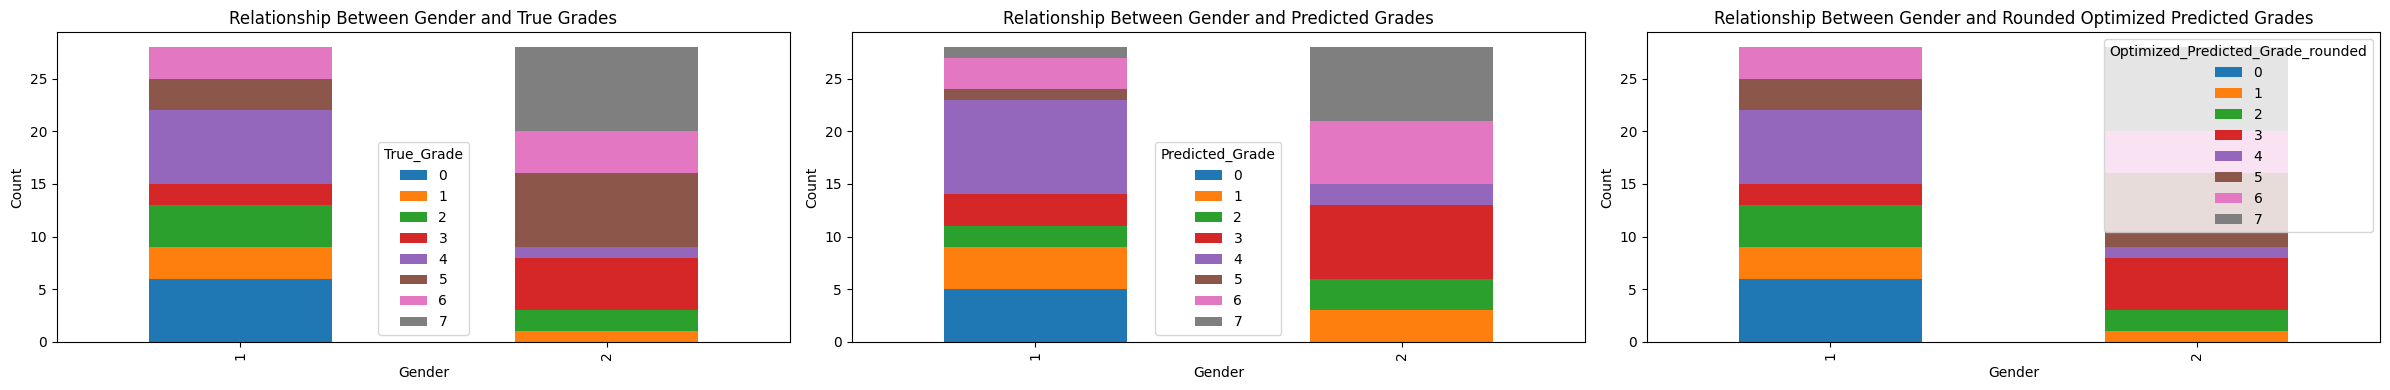

In [14]:
plt.figure(figsize=(24, 4))

plt.subplot(1, 3, 1)
true_gender_grades = X_test.groupby('2')['True_Grade'].value_counts().unstack()
true_gender_grades.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relationship Between Gender and True Grades')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
predicted_gender_grades = X_test.groupby('2')['Predicted_Grade'].value_counts().unstack()
predicted_gender_grades.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relationship Between Gender and Predicted Grades')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
predicted_gender_grades = X_test.groupby('2')['Optimized_Predicted_Grade_rounded'].value_counts().unstack()
predicted_gender_grades.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relationship Between Gender and Rounded Optimized Predicted Grades')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

Strangely, after making gender and scores as independently uncorrelated as possible, gender_1's overall score is still a bit lower than gender_2's, which approximates the original data, so maybe there wasn't much correlation between the two features in the first place?

## Individual Fairness

The scores are obviously discrete, and if a course has a total number of successful completions required, say only 45 people can pass, then there will be many people with the same score on the passing line, so how can we tell if these people will pass? This brings us to the issue of individual fairness.

In [22]:
X_test_sorted = X_test.sort_values(by='True_Grade', ascending=False)

X_test_sorted['RANK'] = X_test_sorted['True_Grade'].rank(method='first', ascending=False)

# The first 45 students pass
required_rank = 45
X_test_sorted['pass'] = np.where(X_test_sorted['RANK'] <= required_rank, 1, 0)

lambda_value = 0.1

def calculate_probability_differences(df_sorted, lambda_value):
    df_sorted['pass_smoothy'] = df_sorted['pass']
    for i in range(required_rank-6, required_rank+5):
        for j in range(i+1, required_rank+5):
            d = abs(df_sorted.iloc[j]['RANK'] - df_sorted.iloc[i]['RANK'])

            df_sorted.at[df_sorted.index[i], 'pass_smoothy'] = max(df_sorted.iloc[i]['pass_smoothy'], df_sorted.iloc[j]['pass_smoothy'] - lambda_value * d)
            df_sorted.at[df_sorted.index[j], 'pass_smoothy'] = max(df_sorted.iloc[j]['pass_smoothy'], df_sorted.iloc[i]['pass_smoothy'] - lambda_value * d)

calculate_probability_differences(X_test_sorted, lambda_value)

print(X_test_sorted[['True_Grade', 'RANK', 'pass', 'pass_smoothy']])

     True_Grade  RANK  pass  pass_smoothy
262           7   1.0     1           1.0
268           7   2.0     1           1.0
77            7   3.0     1           1.0
264           7   4.0     1           1.0
75            7   5.0     1           1.0
277           7   6.0     1           1.0
84            7   7.0     1           1.0
92            7   8.0     1           1.0
108           6   9.0     1           1.0
90            6  10.0     1           1.0
245           6  11.0     1           1.0
73            6  12.0     1           1.0
97            6  13.0     1           1.0
259           6  14.0     1           1.0
240           6  15.0     1           1.0
237           5  16.0     1           1.0
68            5  17.0     1           1.0
46            5  18.0     1           1.0
238           5  19.0     1           1.0
6             5  20.0     1           1.0
30            5  21.0     1           1.0
66            5  22.0     1           1.0
239           5  23.0     1       